In [1]:
# Run this first!!!

from __future__ import division
import math
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../common')
import util
import common_probs
import arbitrary_probs_util
import arbitrary_probs_calcs as calcs

# Overview

At this point, I would like to see if the result proved last week will extend to arbitrary probabilities rather than all letters occuring in a given set with probability 1/2. For this define a vector $p$ where entry $p_\sigma$ is the probability of the letter $\sigma$ appearing in a given set conditioned on the fact that this set is not empty. It is important to note $p$ is not actually a random vector because its entries do not need to sum to 1.

Really the only thing that changes when we relax the constraints on the probabilities is the values of $c_2$ and $c_{1, 2}$. If these values can be found and we can prove (if it is even true) that $c_2^2 \leq c_{1, 2}$ then the proof should extend arbitrary probabilities.

# Finding a New $c_2$

Consider sets $S_1$ and $S_2$ and the probability that these sets "match" (i.e. $S_1 \cap S_2 \neq \emptyset$). Previously I have denoted a "match" between two sets as $==$ and the probability $c_2 = P(S_1 == S_2 | S_1 \neq \emptyset, S_2 \neq \emptyset)$. To calculate $c_2$ note that...

$$
P(S_1 == S_2) = P(S_1 == S_2 | S_1 \neq \emptyset, S_2 \neq \emptyset) P( S_1 \neq \emptyset, S_2 \neq \emptyset) 
$$
$$
+ P(S_1 == S_2 | S_1 = \emptyset, S_2 \neq \emptyset) P( S_1 = \emptyset, S_2 \neq \emptyset)
$$
$$
+ P(S_1 == S_2 | S_1 \neq \emptyset, S_2 = \emptyset) P( S_1 \neq \emptyset, S_2 = \emptyset) 
$$
$$
+ P(S_1 == S_2 | S_1 = \emptyset, S_2 = \emptyset) P( S_1 = \emptyset, S_2 = \emptyset)
$$

Because of my definition of what it means to be matching, two sets cannot be matching if at least one of them is $\emptyset$. Therefore, only the first term in the sum needs to be considered. Noting this we get the following:

$$
P(S_1 == S_2 | S_1 \neq \emptyset, S_2 \neq \emptyset) = \frac{P(S_1 == S_2)}{P( S_1 \neq \emptyset, S_2 \neq \emptyset)}
$$

Now we just need to calculate the numerator and denomenator of this expression. Starting with the numerator...

$$
P(S_1 == S_2) = 1 - P(S_1 != S_2) = 1 - P\left(\sigma \textrm{ is in not in both $S_1$ and $S_2$ } \forall \sigma \in \Sigma \right) 
$$

$$
= 1 - \prod_{\sigma \in \Sigma} \left(1 - P(\sigma \in S_1 \textrm{ and } \sigma \in S_2) \right) = 1 - \prod_{\sigma \in \Sigma} \left(1 - p_\sigma^2 \right)
$$

Now for the denomenator...

$$
P( S_1 \neq \emptyset, S_2 \neq \emptyset) = P( S_1 \neq \emptyset)^2 = \left(1 - \prod_{\sigma \in \Sigma} (1 - p_\sigma) \right)^2
$$

Putting this together we arrive at..

$$
c_2 = \frac{1 - \prod_{\sigma \in \Sigma} \left(1 - p_\sigma^2 \right)}{\left(1 - \prod_{\sigma \in \Sigma} (1 - p_\sigma) \right)^2}
$$

To test this we can do simulations and compare to this theoretical answer...

In [13]:
def get_relative_error(trials, max_alph_size):
    random_probs = arbitrary_probs_util.get_random_probs(max_alph_size=max_alph_size)
    theor = calcs.theoretical_c2(random_probs)
    sim = calcs.sim_c2(random_probs, trials)
    return (len(random_probs), (sim - theor) / theor)

def scatter_plot(num_points, trials, max_alph_size):
    data = [get_relative_error(trials, max_alph_size) for _ in xrange(num_points)]
    xs = [pt[0] for pt in data]
    ys = [pt[1] for pt in data]
    plt.scatter(xs, ys, alpha=0.5)
    plt.axhline(0, color='k')
    plt.ylabel('Relative Error')
    plt.xlabel('Alphabet Size')
    plt.title('Relative Errors')
    plt.show()

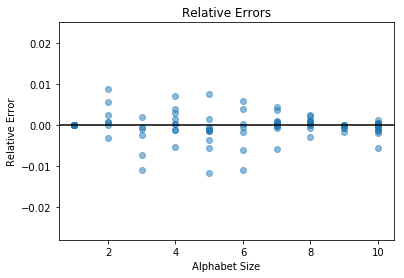

In [15]:
# Constants
NUM_POINTS = 100 # The number of random letter probabilities to test.
TRIALS = 10000 # The number of trials to perform for each list of probabilities.
MAX_ALPH_SIZE = 10 # The maximum possible alphabet size to test.

scatter_plot(NUM_POINTS, TRIALS, MAX_ALPH_SIZE)

The low relative errors suggest that this is the correct theoretical probability.

## Finding a New $c_{1, 2}$

Consider three sets $\mathcal{P}$, $S_1$, and $S_2$ randomly formed according to the probabilities in $p$. Then we wish to find $c_{1, 2}$ which is...

$$
c_{1, 2} = P(\mathcal{P} == S_1, \mathcal{P} == S_2 | \mathcal{P} \neq \emptyset, S_1 \neq \emptyset, S_2 \neq \emptyset)
$$

Again, I rely on the fact that this probability is conditionally independent and use total law of probability.

$$
= \sum_{\mathcal{P}} P(\mathcal{P}  | \mathcal{P} \neq \emptyset) P(\mathcal{P} == S_1 | \mathcal{P}, S_1 \neq \emptyset) P(\mathcal{P} == S_2 | \mathcal{P}, S_2 \neq \emptyset)
$$

$$
= \sum_{\mathcal{P}} P(\mathcal{P}  | \mathcal{P} \neq \emptyset) P(\mathcal{P} == S_1 | \mathcal{P}, S_1 \neq \emptyset)^2
$$

To proceed I find the two required probabilities to compute each term in the sum...

$$
P(\mathcal{P}) = P\left(\mathcal{P}| \mathcal{P} \neq \emptyset \right) P\left(\mathcal{P} \neq \emptyset \right) + P\left(\mathcal{P}| \mathcal{P} = \emptyset \right) P\left(\mathcal{P} = \emptyset \right)
$$

$$
\implies P(\mathcal{P}  | \mathcal{P} \neq \emptyset) = \frac{P(\mathcal{P}) - P\left(\mathcal{P}| \mathcal{P} = \emptyset \right) P\left(\mathcal{P} = \emptyset \right)}{P\left(\mathcal{P} \neq \emptyset \right)} 
$$

Note that the second part of the above expression is undefined when $\mathcal{P} = \emptyset$ and zero otherwise. For this reason it is dropped and we get...

$$
P(\mathcal{P}  | \mathcal{P} \neq \emptyset) = \frac{P(\mathcal{P})}{P\left(\mathcal{P} \neq \emptyset \right)} = \frac{\left(\prod_{\sigma \in \mathcal{P}} p_\sigma \right)\left(\prod_{\sigma \in \mathcal{P}^C} (1 - p_\sigma) \right)}{1 - \prod_{\sigma \in \Sigma} (1 - p_\sigma)}
$$

As for the other term in the summation we get...

$$
P(\mathcal{P} == S_1 | \mathcal{P}) = P(\mathcal{P} == S_1 | \mathcal{P}, S_1 \neq \emptyset) P(S_1 \neq \emptyset) + P(\mathcal{P} == S_1 | \mathcal{P}, S_1 = \emptyset) P(S_1 = \emptyset)
$$

Again, we cannot have a match if $S_1$ is the empty set so the second term in the sume drops and we can simplify to...

$$
P(\mathcal{P} == S_1 | \mathcal{P}, S_1 \neq \emptyset) = \frac{P(\mathcal{P} == S_1 | \mathcal{P})}{P(S_1 \neq \emptyset)} = \frac{1 - P(\mathcal{P} != S_1 | \mathcal{P})}{1 - P(S_1 = \emptyset)}
$$

$$
= \frac{1 - \prod_{\sigma \in \mathcal{P}} (1 - p_\sigma)}{1 - \prod_{\sigma \in \Sigma} (1 - p_\sigma)}
$$

Combining these two things we get that

$$
c_{1, 2} = \sum_{\mathcal{P}} \frac{\left(\prod_{\sigma \in \mathcal{P}} p_\sigma \right)\left(\prod_{\sigma \in \mathcal{P}^C} (1 - p_\sigma) \right) \left(1 - \prod_{\sigma \in \mathcal{P}} (1 - p_\sigma)\right)}{\left(1 - \prod_{\sigma \in \Sigma} (1 - p_\sigma)\right)^2}
$$

In [17]:
def get_relative_error(trials, max_alph_size):
    random_probs = arbitrary_probs_util.get_random_probs(max_alph_size=max_alph_size)
    theor = calcs.theoretical_c12(random_probs)
    sim = calcs.sim_c12(random_probs, trials)
    return (len(random_probs), (sim - theor) / theor)

def scatter_plot(num_points, trials, max_alph_size):
    data = [get_relative_error(trials, max_alph_size) for _ in xrange(num_points)]
    xs = [pt[0] for pt in data]
    ys = [pt[1] for pt in data]
    plt.scatter(xs, ys, alpha=0.5)
    plt.axhline(0, color='k')
    plt.ylabel('Relative Error')
    plt.xlabel('Alphabet Size')
    plt.title('Relative Errors')
    plt.show()

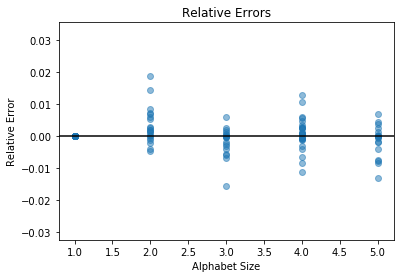

In [20]:
# Constants
NUM_POINTS = 100 # The number of random letter probabilities to test.
TRIALS = 10000 # The number of trials to perform for each list of probabilities.
MAX_ALPH_SIZE = 5 # The maximum possible alphabet size to test.

scatter_plot(NUM_POINTS, TRIALS, MAX_ALPH_SIZE)

Based on the low relative error, it seems that this is the right probability.

## Comparing $c_2^2$ and $c_{1, 2}$

In the previous proof a key feature was that $c_2^2 \leq c_{1, 2}$. Therefore, I looked over several different vectors of $p$ to see if this inequality helf for all of them.

In [4]:
def does_ineq_hold(trials, max_alph_size):
    num_violating = 0
    for _ in xrange(trials):
        random_probs = arbitrary_probs_util.get_random_probs(max_alph_size=max_alph_size)
        diff = calcs.theoretical_c2(random_probs) ** 2 - calcs.theoretical_c12(random_probs)
        if calcs.theoretical_c2(random_probs) ** 2 > calcs.theoretical_c12(random_probs):
#             print 'FALSE FOR PROBS:', random_probs, diff
            num_violating += 1
    print 'All done with %d violating inequality.' % num_violating


In [6]:
TRIALS = 10000
MAX_ALPH_SIZE = 4

does_ineq_hold(TRIALS, MAX_ALPH_SIZE)

All done with 651 violating inequality.


It seems that the inequality might be true here too. Note that violations were found above for differences of around 10^-16 but this seems more like machine error noise than a substantial difference. However, perhaps other checks should be performed before I try to prove the inequality.